# Animation

time stamp at 1:19

NCL_animate_1

Please note:
   - Executing this script will not display a gif, but you have the option to uncomment a line at the bottom that will save a gif in the same directory as this script.

[GeoCAT-examples](https://geocat-examples.readthedocs.io/en/latest/gallery/Animations/NCL_animate_1.html)


### Import packages:



In [1]:
import cartopy.crs as ccrs
import matplotlib.animation as animation
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

import geocat.datafiles as gdf
import geocat.viz as gv

### Read in data:



In [3]:
# Open a netCDF data file using xarray default engine and load the data into xarrays
# Disable time decoding due to missing necessary metadata
ds = xr.open_dataset(gdf.get("netcdf_files/meccatemp.cdf"), decode_times=False)

tas = ds.t
tas

<xarray.DataArray 't' (time: 31, lat: 40, lon: 49)>
[60760 values with dtype=float32]
Coordinates:
  * lat      (lat) int32 -86 -82 -77 -73 -68 -64 -59 ... 59 64 68 73 77 82 86
  * lon      (lon) int32 -180 -172 -165 -157 -150 -142 ... 150 157 165 172 180
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
Attributes:
    units:    degrees

### Create animation:



/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


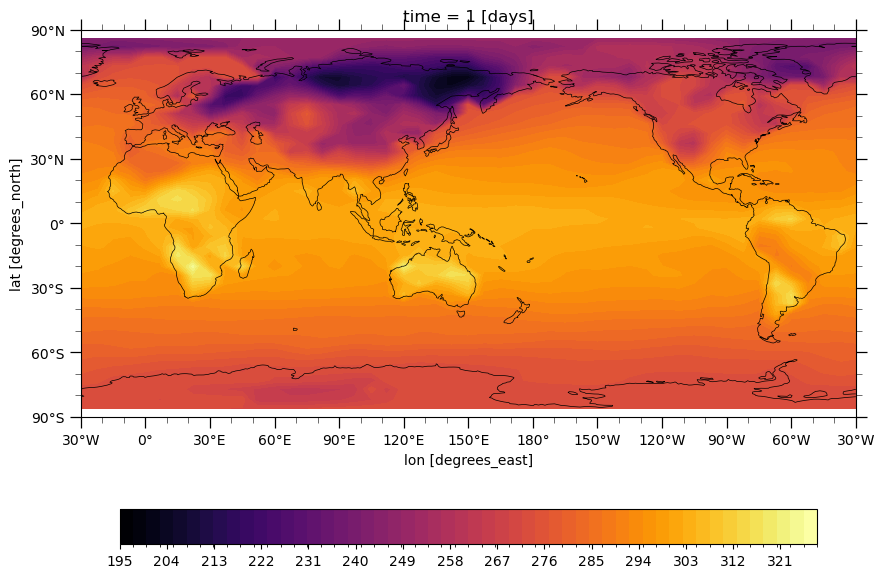

In [4]:
# Set up Axes with Cartopy Projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.coastlines(linewidths=0.5)
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

# Use geocat.viz.util convenience function to set axes limits & tick values
gv.set_axes_limits_and_ticks(ax,
                             xlim=(-180, 180),
                             ylim=(-90, 90),
                             xticks=np.linspace(-180, 180, 13),
                             yticks=np.linspace(-90, 90, 7))

# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat.viz.util convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)

# create initial plot that establishes a colorbar
tas[0, :, :].plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           vmin=195,
                           vmax=328,
                           levels=53,
                           cmap="inferno",
                           cbar_kwargs={
                               "extendrect": True,
                               "orientation": "horizontal",
                               "ticks": np.arange(195, 332, 9),
                               "label": "",
                               "shrink": 0.90
                           })


# animate function for matplotlib FuncAnimation
def animate(i):
    tas[i, :, :].plot.contourf(
        ax=ax,
        transform=ccrs.PlateCarree(),
        vmin=195,
        vmax=328,
        levels=53,
        cmap="inferno",
        add_colorbar=False,
    )

    gv.set_titles_and_labels(
        ax,
        maintitle="January Global Surface Temperature (K) - Day  " +
        str(tas.coords['time'].values[i])[:13],
        xlabel="",
        ylabel="")

### Run:

In [7]:
# runs the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=30, interval=200)

### Save:

In [8]:
# Uncomment this line to save the created animation
anim.save('images/animate_1.gif', writer='pillow', fps=5)

/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/jkent/miniconda3/envs/advanced-viz-cookbook/lib/python3.10/site-packages/shapely/co